# Chapter 7: Demo RandomForestClassifier

In [5]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)
# %cd '/content/gdrive/My Drive/LDS6_MachineLearning/practice/Chapter7_Random_Forest/'

In [6]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn import datasets
#from IPython.display import Image  
from sklearn import tree
import pydotplus
import pandas as pd

In [7]:
iris = pd.read_excel("Data/Iris.xls")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = iris[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
y = iris['iris']

In [9]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y[:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: iris, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [13]:
clf = RandomForestClassifier(n_estimators=100) # so cay trong rung
# lam voi: 30, 50, 70, 100, 150, 200 => chon Rung phu hop theo so luong cay (score) 
# thuc hien vong lap theo so cay trong rung lst_cay = [30, 50, 70, 100] 
# => tao rung theo tung gia tri trong lst_cay 
# => do do chinh xac acc, neu do chinh xac = nhau => so sanh train/test r^2
# => chon model random forest co do chinh xac cao nhat, chenh lech giua train/test r^2 la it nhat
# Train model
model = clf.fit(X_train, y_train)

In [14]:
# How to show information of trees in random forest
model.estimators_[:3] # 0..99

[DecisionTreeClassifier(max_features='auto', random_state=1530173768),
 DecisionTreeClassifier(max_features='auto', random_state=1387557316),
 DecisionTreeClassifier(max_features='auto', random_state=1024234789)]

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn import metrics

In [17]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8444444444444444


In [18]:
# Make new prediction
import numpy as np
X_new = np.array([[4.7, 3.2, 1.3, 0.2],
                  [6.6, 3. , 4.4, 1.4],
                  [5.9, 3. , 5.1, 1.8]])

In [19]:
yhat_new = model.predict(X_new)
yhat_new

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Find important features in sklearn

In [20]:
imp_features = pd.Series(model.feature_importances_, 
                         index=X.columns).sort_values(ascending = False)

In [21]:
imp_features

petalwidth     0.482627
petallength    0.391495
sepallength    0.116992
sepalwidth     0.008886
dtype: float64

In [22]:
import matplotlib.pyplot as plt

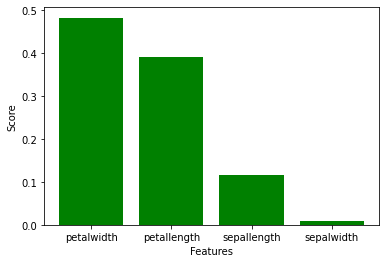

In [23]:
plt.bar(imp_features.index, imp_features, color="g")
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

In [24]:
# Build model with 2 important features
X = iris[['petallength', 'petalwidth']]
y = iris['iris']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state=20)

In [26]:
model_new = RandomForestClassifier(n_estimators=100)
# Train model
model_new.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred_new = model_new.predict(X_test)

In [28]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_new))

Accuracy: 0.8888888888888888


In [29]:
# Make new prediction
import numpy as np
X_new = np.array([[1.3, 0.2],
                  [4.4, 1.4],
                  [5.1, 1.8]])

In [30]:
yhat_new = model_new.predict(X_new)
yhat_new

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
# Avg max depth 
max_depth = list()
for tree in model_new.estimators_:
    max_depth.append(tree.tree_.max_depth)

print("avg max depth %0.1f" % (sum(max_depth) / len(max_depth)))

avg max depth 3.5
